In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [4]:
df_test = pd.read_csv('/content/task 1 codsoft/test_data.txt', sep=":::", header = 0 , engine = 'python')
df_train = pd.read_csv('/content/task 1 codsoft/train_data.txt', sep=":::", header = 0 , engine = 'python')
df_train.columns = ['SN', 'movie_name', 'category', 'confession']
df_test.columns = ['SN', 'movie_name' , 'confession']

In [5]:
df_test.head()

,SN,movie_name,confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [6]:

df_train.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24581 entries, 0 to 24580
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          24581 non-null  int64 
 1   movie_name  24581 non-null  object
 2   confession  24581 non-null  object
dtypes: int64(1), object(2)
memory usage: 576.2+ KB


In [9]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30437 entries, 0 to 30436
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          30437 non-null  int64 
 1   movie_name  30437 non-null  object
 2   category    30437 non-null  object
 3   confession  30437 non-null  object
dtypes: int64(1), object(3)
memory usage: 951.3+ KB


In [10]:

df_train.describe()

,SN
count,30437.000000
mean,15220.000000
std,8786.549408
min,2.000000
25%,7611.000000
50%,15220.000000
75%,22829.000000
max,30438.000000


In [11]:

df_test.describe()

,SN
count,24581.00000
mean,12292.00000
std,7096.06782
min,2.00000
25%,6147.00000
50%,12292.00000
75%,18437.00000
max,24582.00000


In [12]:

df_test.isnull().sum()

,0
SN,0
movie_name,0
confession,0


In [13]:

df_train.isnull().sum()

,0
SN,0
movie_name,0
category,0
confession,0


In [14]:

df_train.count()

,0
SN,30437
movie_name,30437
category,30437
confession,30437


In [15]:

df_test.count()

,0
SN,24581
movie_name,24581
confession,24581


In [16]:

df_train.iloc[0:3]

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [17]:

df_train.loc[0]

,0
SN,2
movie_name,Cupid (1997)
category,thriller
confession,A brother and sister with a past incestuous r...


In [18]:

df_test.shape

(24581, 3)

In [19]:

df_train.shape

(30437, 4)

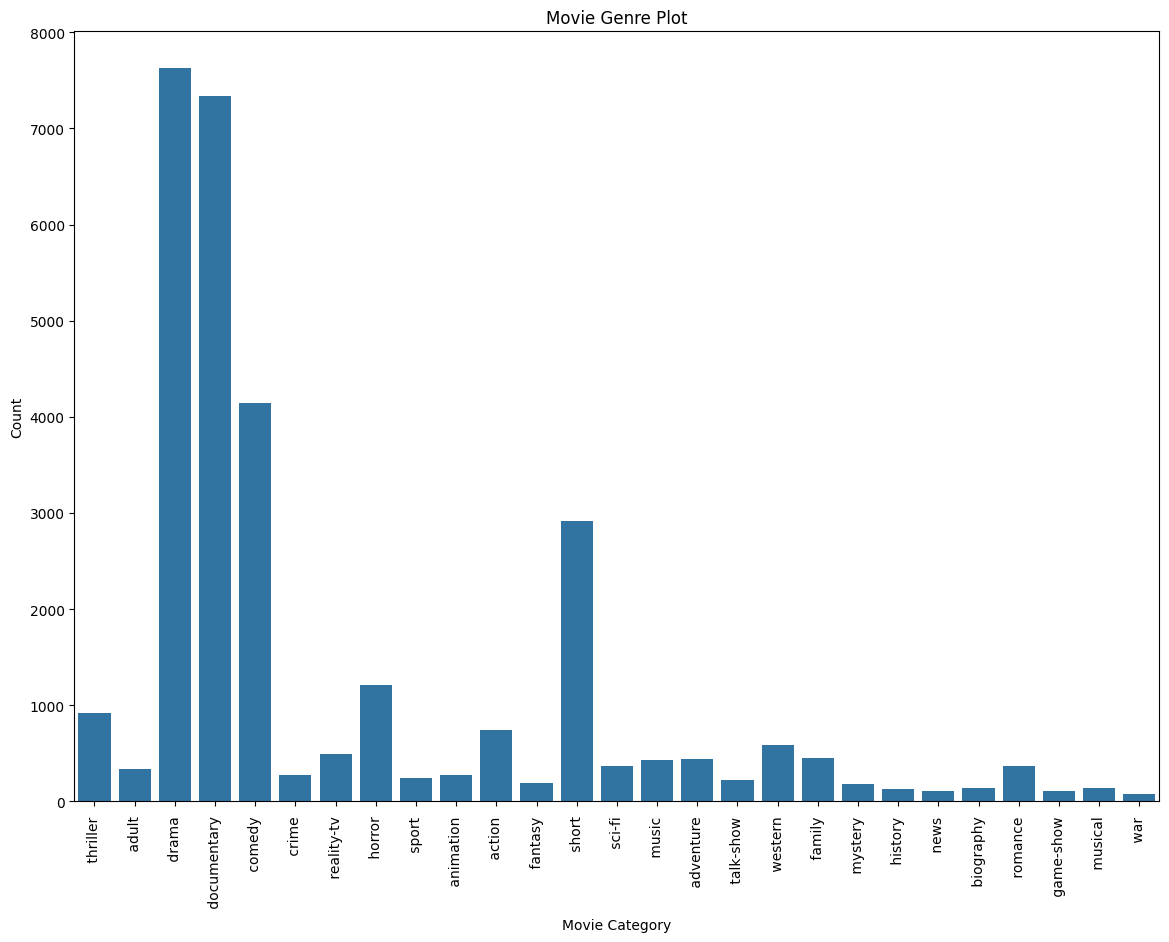

In [20]:
plt.figure(figsize=(14,10))
sns.countplot(x='category', data=df_train)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90);
plt.show()

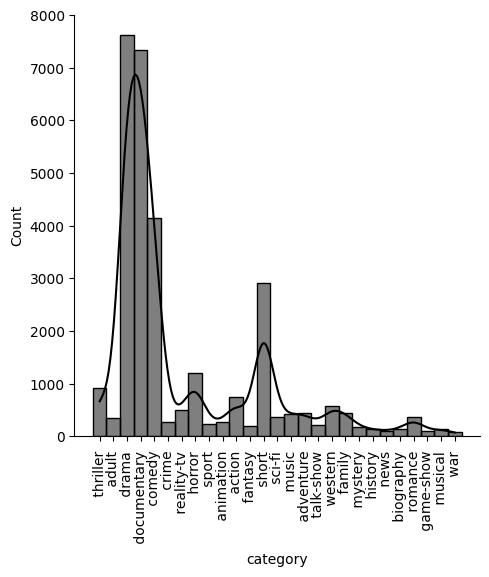

In [21]:
sns.displot(df_train.category, kde =True, color = "black")
plt.xticks(rotation=90);

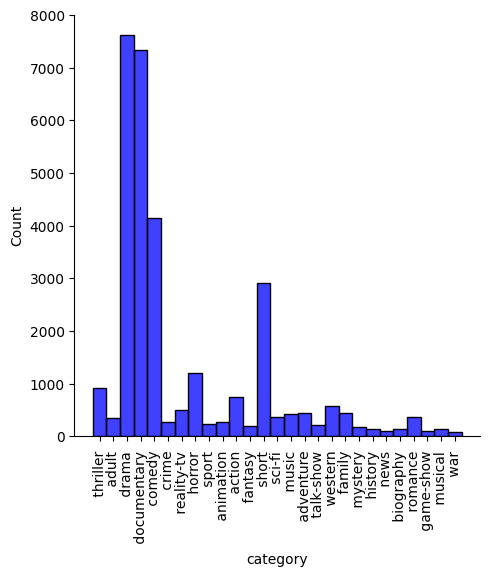

In [22]:

sns.displot(df_train.category, kde=False, color = "blue")
plt.xticks(rotation=90);

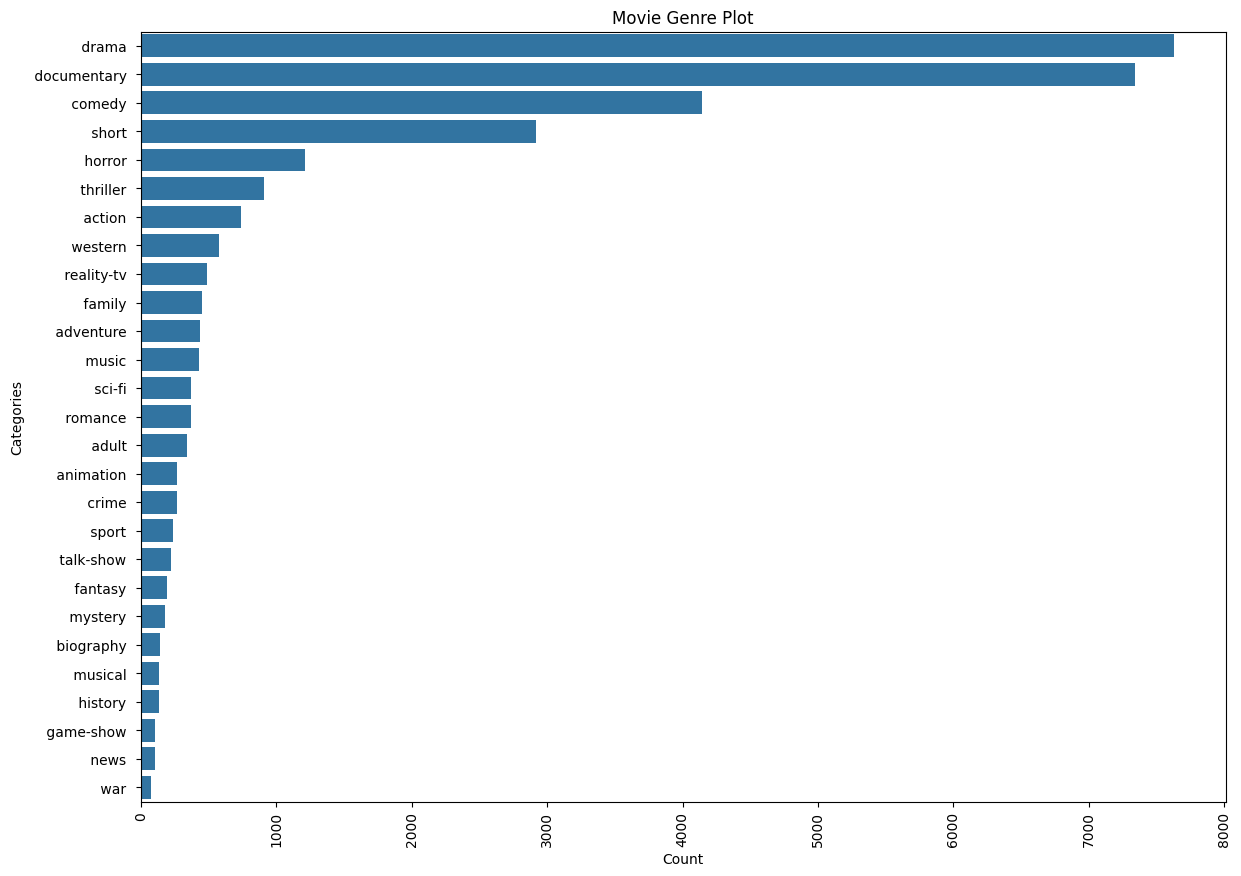

In [23]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

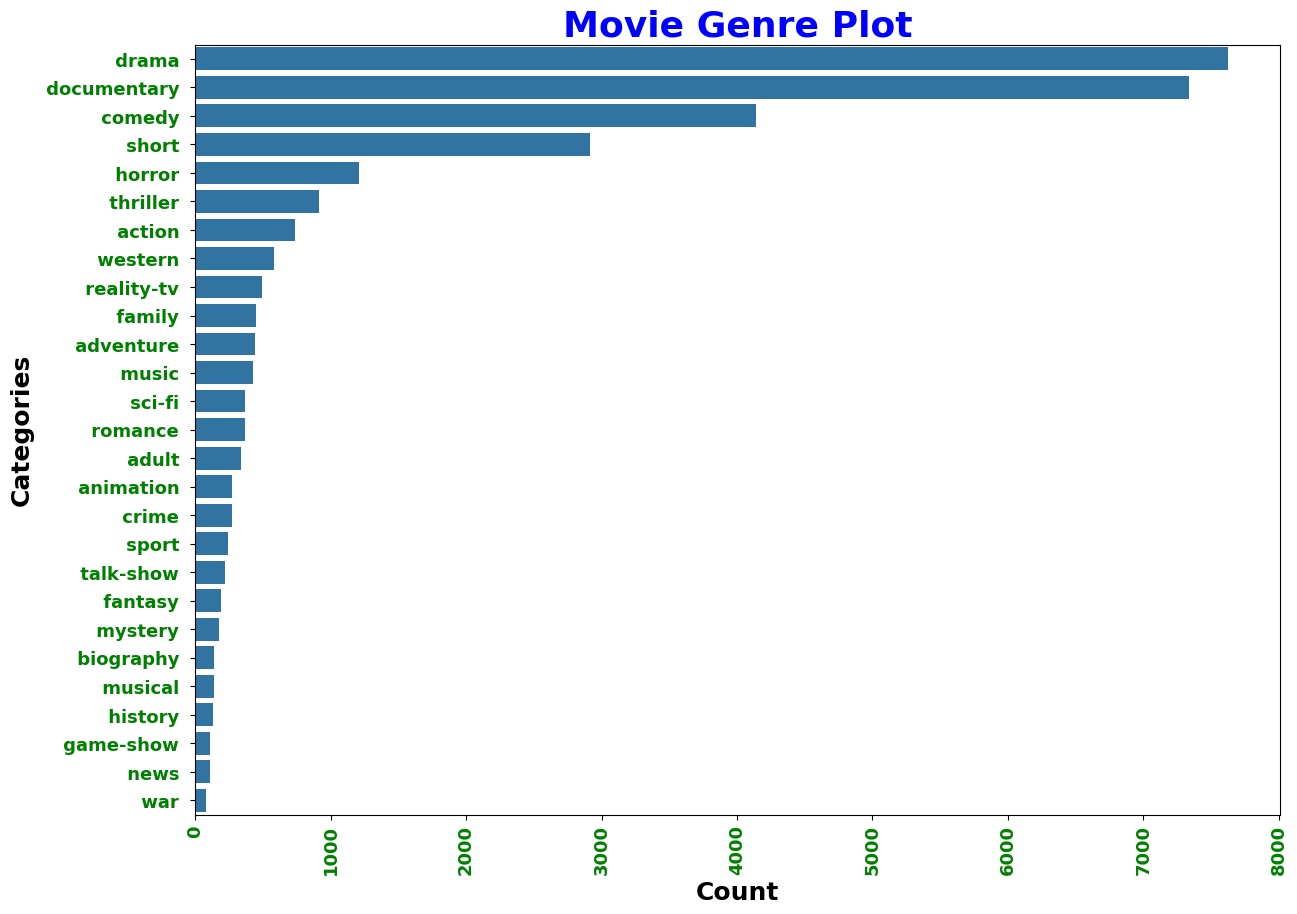

In [24]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count', fontsize = 18, fontweight = 'bold')
plt.ylabel('Categories', fontsize = 18, fontweight = 'bold')
plt.title('Movie Genre Plot', fontsize = 26, fontweight = 'bold', color = 'blue')
plt.xticks(rotation=90, fontsize = 13, fontweight = 'bold', color = 'green')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'green')
plt.show()

In [26]:
df_combined = pd.concat([df_train, df_test], axis = 0)

In [27]:
df_combined.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [28]:

df_combined.shape

(55018, 4)

In [29]:

df_combined.size


220072

In [30]:

df_combined.isnull().any()

,0
SN,False
movie_name,False
category,True
confession,False


In [31]:

df_combined.count()

,0
SN,55018
movie_name,55018
category,30437
confession,55018


In [32]:
encoder = LabelEncoder()
df_combined["category"] = encoder.fit_transform(df_combined["category"].values)

In [33]:
encoder = LabelEncoder()
df_combined["movie_name"] = encoder.fit_transform(df_combined["movie_name"].values)

In [34]:

df_combined.head()

,SN,movie_name,category,confession
0,2,15779,24,A brother and sister with a past incestuous r...
1,3,54552,1,As the bus empties the students for their fie...
2,4,48793,8,To help their unemployed father make ends mee...
3,5,49506,8,The film's title refers not only to the un-re...
4,6,37728,7,Quality Control consists of a series of 16mm ...


In [35]:
df_combined.category = df_combined.category.fillna(df_combined.category.mean())

In [36]:

df_combined.count()

,0
SN,55018
movie_name,55018
category,55018
confession,55018


In [37]:
vectorizer = TfidfVectorizer()

In [38]:
X = vectorizer.fit_transform(df_combined["confession"])

In [39]:

df_combined.head()

,SN,movie_name,category,confession
0,2,15779,24,A brother and sister with a past incestuous r...
1,3,54552,1,As the bus empties the students for their fie...
2,4,48793,8,To help their unemployed father make ends mee...
3,5,49506,8,The film's title refers not only to the un-re...
4,6,37728,7,Quality Control consists of a series of 16mm ...


In [40]:
y = df_combined["category"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:

naive_bayes_model = MultinomialNB()

In [43]:

naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [45]:
nb_predictions = naive_bayes_model.predict(X_test)

In [46]:
print("Naive Bayes Model:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("r2_Score: ", r2_score(y_test, nb_predictions))

Naive Bayes Model:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  154]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   77]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   96]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   54]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   22]
 [   0    0    0    0    0    6    0    0    3    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  831]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:

logistic_regression_model = LogisticRegression()


In [48]:

logistic_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
lr_predictions = logistic_regression_model.predict(X_test)

In [50]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))

Logistic Regression Model:
[[   2    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  151]
 [   0    0    0    0    0    1    0    0    3    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   73]
 [   0    0    0    0    0    1    0    2    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   94]
 [   0    0    0    0    0    2    0    0    4    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   48]
 [   0    0    0    0    0    0    0    8    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   14]
 [   0    0    0    0    0   94    0    3   28    0    0    0    0    1
     0    0    0    0    0    0    0    1    0    0    0    0    0  713]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
